In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [27]:
#llamo el dataset a analizar
Overdose_1= pd.read_csv("datasets/VSRR_Provisional_Drug_Overdose_Death_Counts 23.csv")
Overdose_1.head()

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
0,AK,2015,April,12 month-ending,Percent with drugs specified,88.0952381,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
1,AK,2015,April,12 month-ending,Psychostimulants with abuse potential (T43.6),NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
2,AK,2015,April,12 month-ending,Number of Drug Overdose Deaths,126,100,0.0,Alaska,Numbers may differ from published reports usin...,**,126
3,AK,2015,April,12 month-ending,Methadone (T40.3),NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
4,AK,2015,April,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN


In [28]:
# cantidad de filas y columnas
Overdose_1.shape

(63945, 12)

In [29]:
#medidas de estadís
Overdose_1.describe()


,Year,Percent Complete,Percent Pending Investigation
count,63945.000000,63945.0,63945.000000
mean,2018.885714,100.0,0.119594
std,2.527259,0.0,0.164904
min,2015.000000,100.0,0.000000
25%,2017.000000,100.0,0.017169
50%,2019.000000,100.0,0.054989
75%,2021.000000,100.0,0.159888
max,2023.000000,100.0,2.102141


In [30]:
Overdose_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63945 entries, 0 to 63944
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          63945 non-null  object 
 1   Year                           63945 non-null  int64  
 2   Month                          63945 non-null  object 
 3   Period                         63945 non-null  object 
 4   Indicator                      63945 non-null  object 
 5   Data Value                     51963 non-null  object 
 6   Percent Complete               63945 non-null  int64  
 7   Percent Pending Investigation  63945 non-null  float64
 8   State Name                     63945 non-null  object 
 9   Footnote                       63945 non-null  object 
 10  Footnote Symbol                63945 non-null  object 
 11  Predicted Value                41133 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usag

In [31]:
#busqueda de datos nulos 
Overdose_1.isnull().sum()

State                                0
Year                                 0
Month                                0
Period                               0
Indicator                            0
Data Value                       11982
Percent Complete                     0
Percent Pending Investigation        0
State Name                           0
Footnote                             0
Footnote Symbol                      0
Predicted Value                  22812
dtype: int64

In [34]:
Values=Overdose_1["Data Value"]
Values

0        88.0952381
1               NaN
2               126
3               NaN
4               NaN
            ...    
63940           NaN
63941         2,925
63942           NaN
63943        56,373
63944           NaN
Name: Data Value, Length: 63945, dtype: object

In [36]:
#modificación a flotantes los datos de la columna Data Value
Overdose_1["Data Value"] = pd.to_numeric(Overdose_1["Data Value"], errors="coerce")

In [37]:
# Excluir la columna "Number of Deaths"
Overdose_1 = Overdose_1[Overdose_1['Indicator'] != 'Number of Deaths']

# Grouping the data by Indicator and summing the Data Value to get total deaths per drug
drug_deaths = Overdose_1.groupby('Indicator')['Data Value'].sum().sort_values(ascending=False)

# Displaying the drugs most commonly involved in overdose deaths
print(drug_deaths.head())

Indicator
Number of Drug Overdose Deaths                                                 1116546.0
Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)               1093049.0
Natural & semi-synthetic opioids (T40.2)                                        942372.0
Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)     914375.0
Opioids (T40.0-T40.4,T40.6)                                                     912194.0
Name: Data Value, dtype: float64


### Indicadores

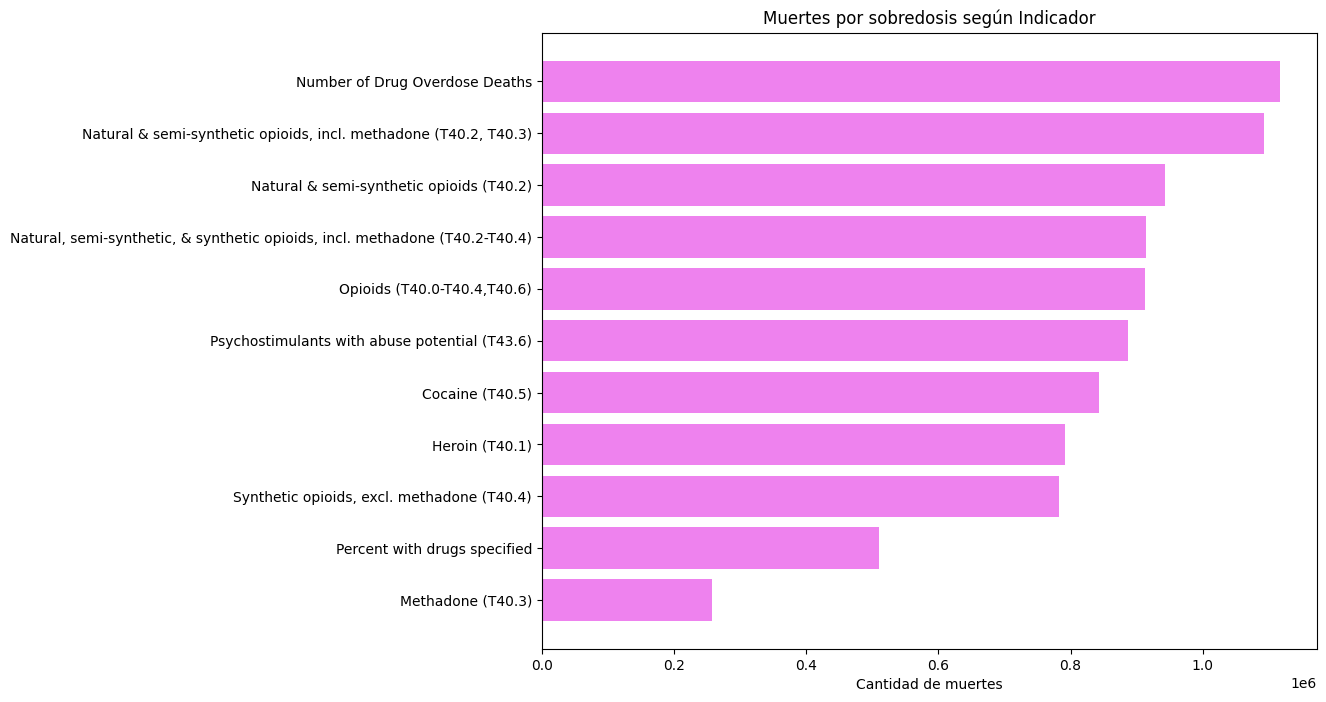

In [38]:
indicadores = drug_deaths.index
valores= drug_deaths.values


plt.figure(figsize=(10, 8))

plt.barh(indicadores, valores, color= "violet")
plt.xlabel("Cantidad de muertes")
plt.title("Muertes por sobredosis según Indicador")
plt.gca().invert_yaxis()#invierte los ejes y los ordena 


plt.show()


In [ ]:
# Agrupar los datos por año y por indicador, y sumar los valores de cada indicador
drug_deaths_yearly = Overdose_1.groupby(['Year', 'Indicator'])['Data Value'].sum().reset_index()

# Recorrer cada año y graficar los indicadores correspondientes
for year in drug_deaths_yearly['Year'].unique():
    plt.figure(figsize=(15, 5))
    data_year = drug_deaths_yearly[(drug_deaths_yearly['Year'] == year)].sort_values(by='Data Value', ascending=False)
    indicadores = data_year["Indicator"]
    valores = data_year["Data Value"]
    plt.barh(indicadores, valores, color="violet")
    plt.xlabel("Cantidad de muertes")
    plt.title(f"Muertes por sobredosis según Indicador - Año {year}")
    plt.gca().invert_yaxis()  # Invierte los ejes y los ordena
    plt.show()

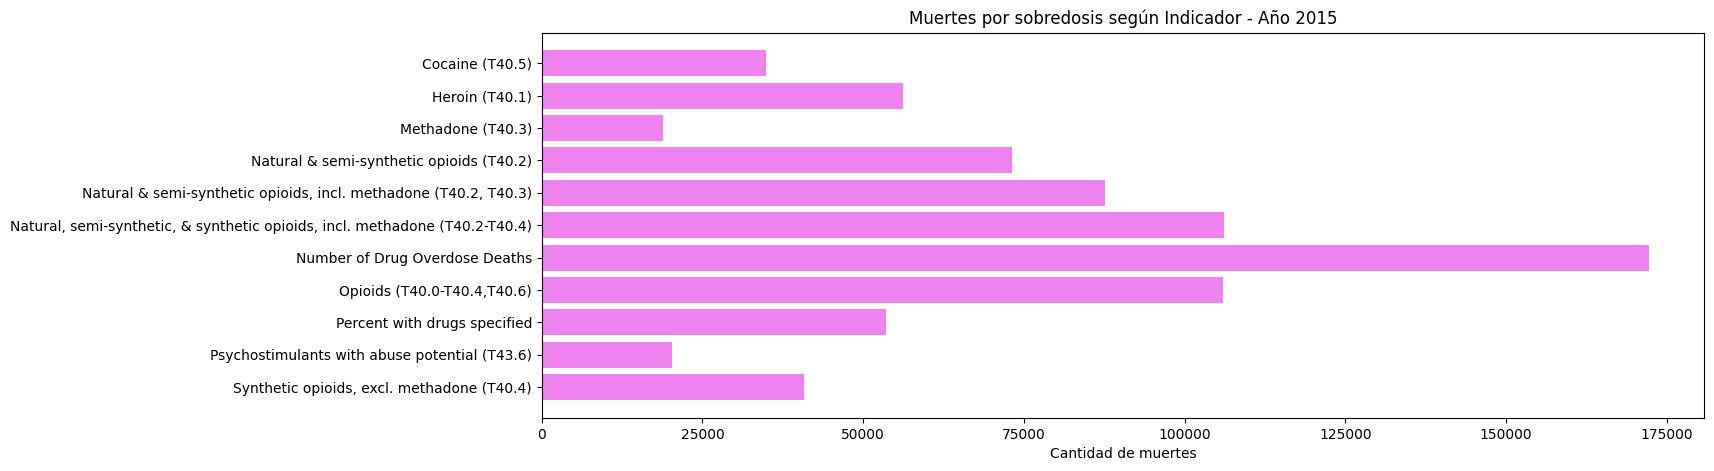

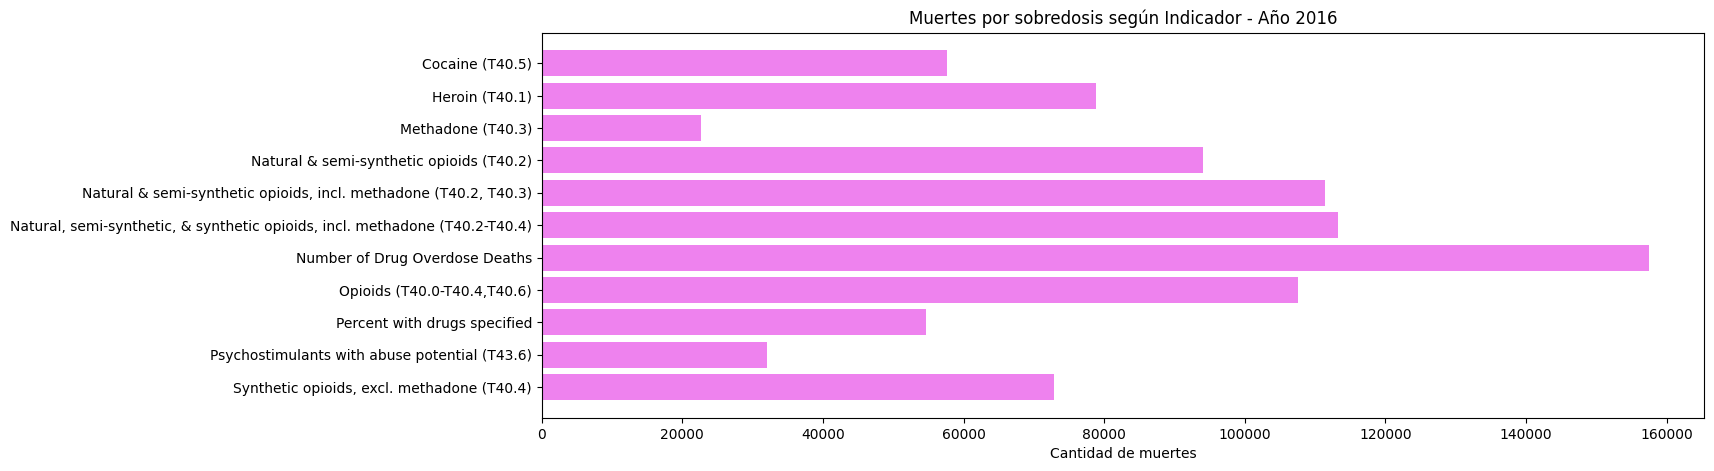

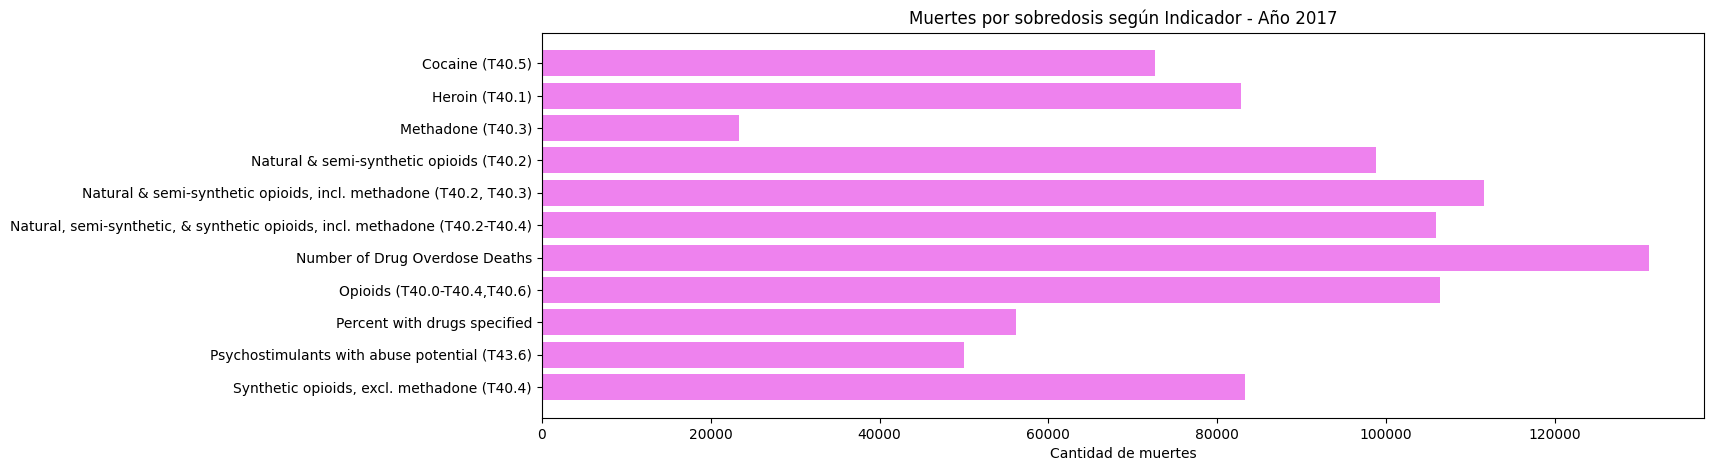

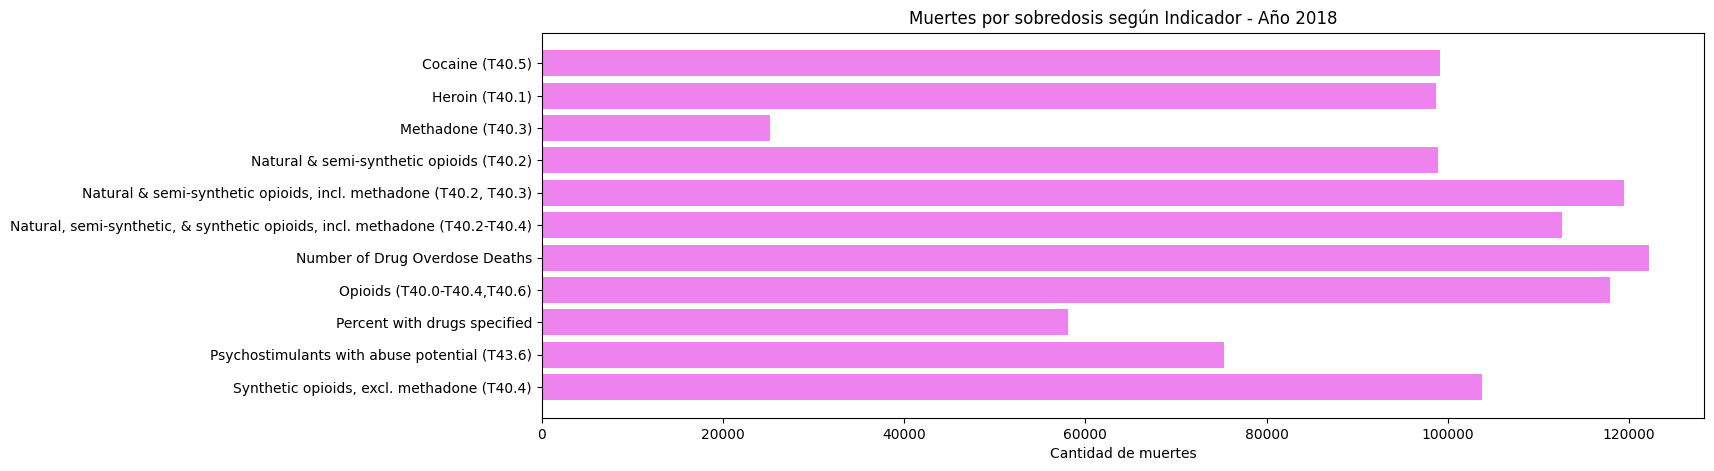

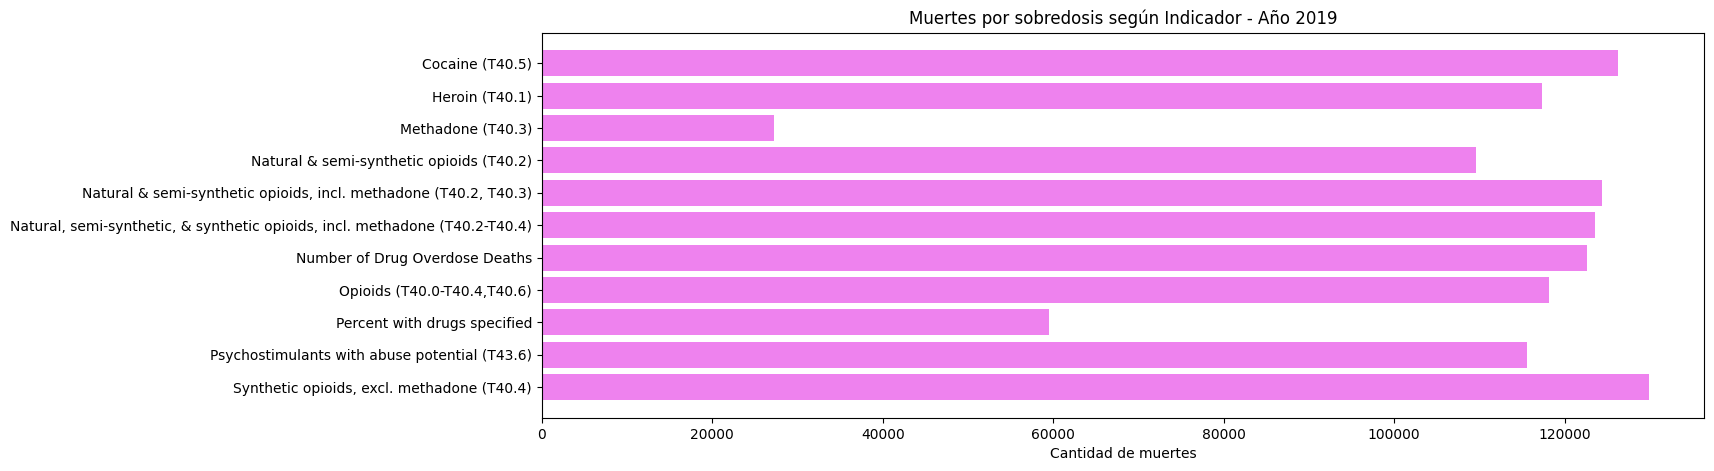

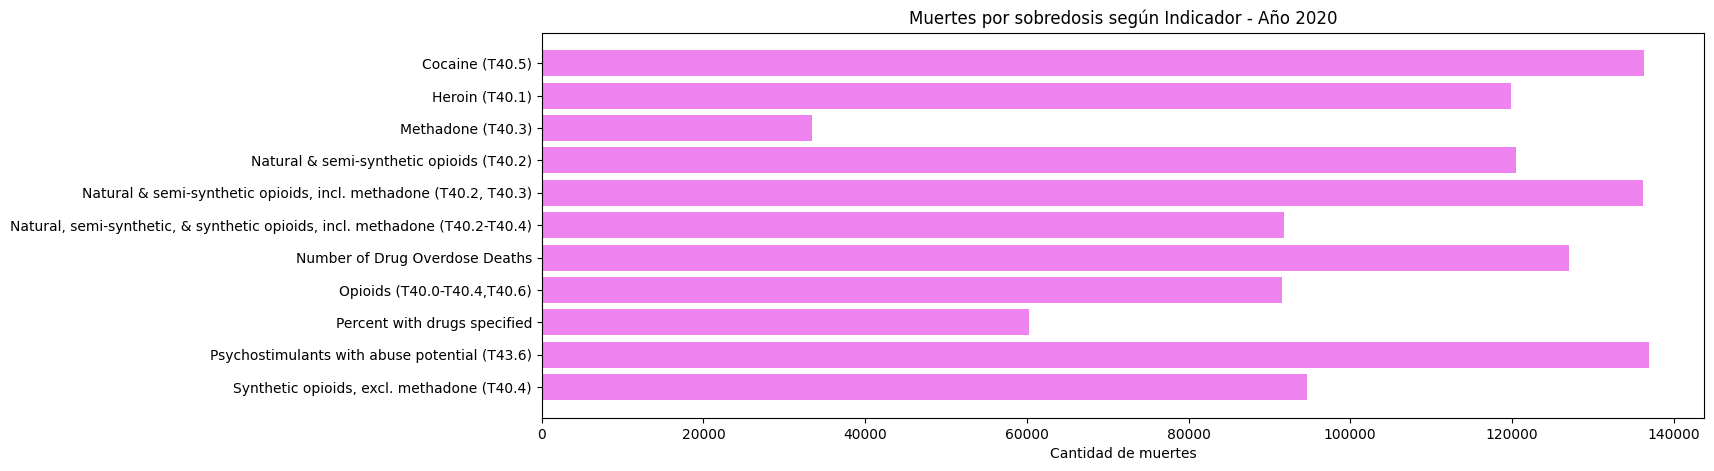

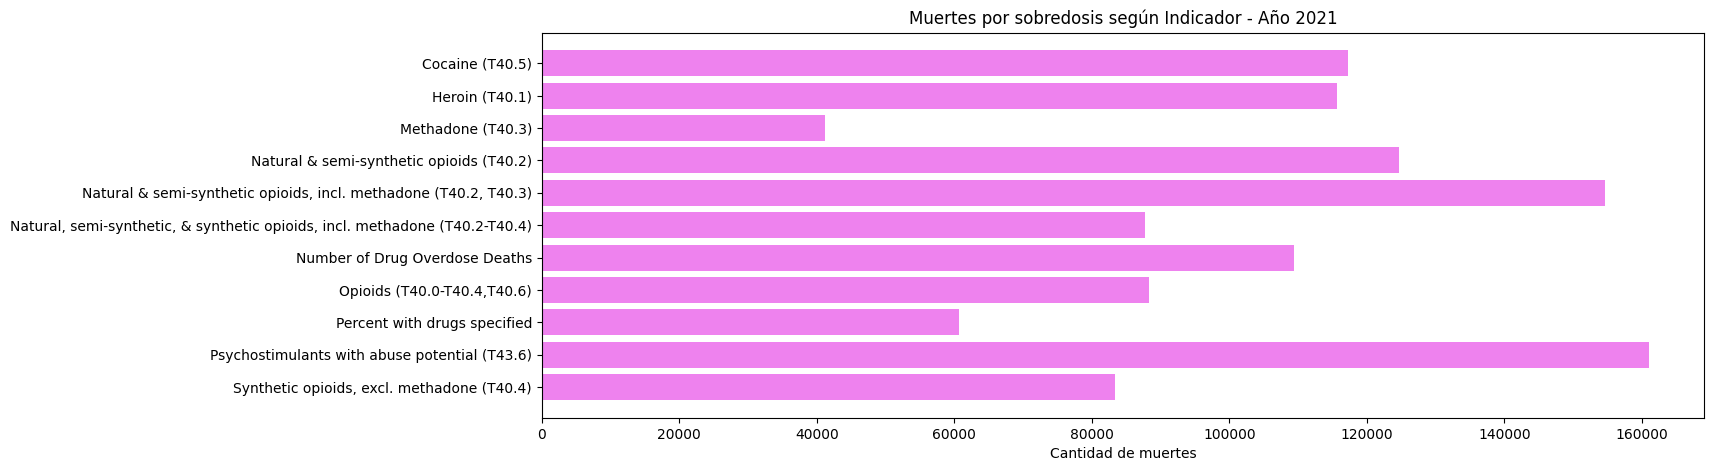

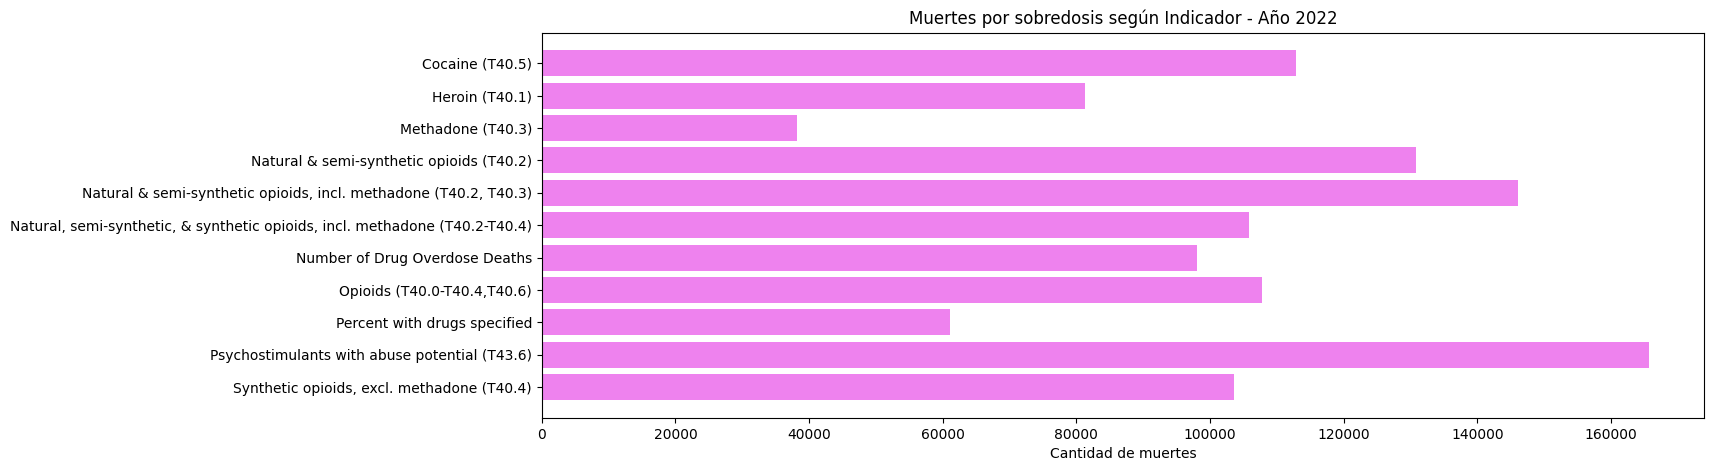

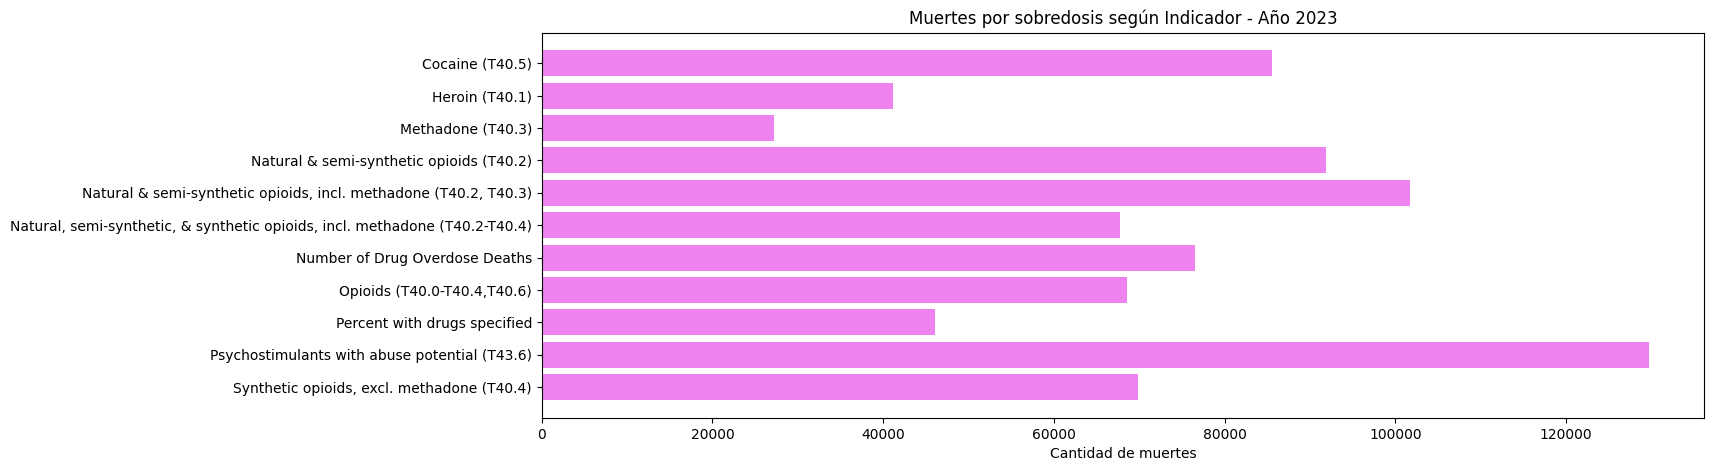

In [39]:
# Agrupar los datos por año y por indicador, y sumar los valores de cada indicador
drug_deaths_yearly = Overdose_1.groupby(['Year', 'Indicator'])['Data Value'].sum()

# Recorrer cada año y graficar los indicadores correspondientes
for year in drug_deaths_yearly.index.get_level_values('Year').unique():
    plt.figure(figsize=(15, 5))
    data_year = drug_deaths_yearly.loc[year]
    indicadores = data_year.index
    valores = data_year.values
    plt.barh(indicadores, valores, color="violet")
    plt.xlabel("Cantidad de muertes")
    plt.title(f"Muertes por sobredosis según Indicador - Año {year}")
    plt.gca().invert_yaxis()  # Invierte los ejes y los ordena
    plt.show()

#### **Conclusión**

### Creación de columna Date_Month_Year y dataset de Número de muertes por sobredosis solamente

In [40]:
import datetime

Overdose_1["Year"] = Overdose_1["Year"].astype(str)
Overdose_1["Date_Month_Year"] = Overdose_1["Month"] + "" + Overdose_1["Year"]

Overdose_1["Date"]= pd.to_datetime(Overdose_1["Date_Month_Year"], format= "%B%Y")

Num_of_drug_Overdose_23= Overdose_1[Overdose_1.Indicator == "Number of Drug Overdose Deaths"]

Num_of_drug_Overdose_23

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value,Date_Month_Year,Date
2,AK,2015,April,12 month-ending,Number of Drug Overdose Deaths,126.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,126,April2015,2015-04-01
21,AK,2015,August,12 month-ending,Number of Drug Overdose Deaths,124.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,124,August2015,2015-08-01
29,AK,2015,December,12 month-ending,Number of Drug Overdose Deaths,121.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,121,December2015,2015-12-01
40,AK,2015,February,12 month-ending,Number of Drug Overdose Deaths,127.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,127,February2015,2015-02-01
55,AK,2015,January,12 month-ending,Number of Drug Overdose Deaths,126.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,126,January2015,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63890,YC,2023,July,12 month-ending,Number of Drug Overdose Deaths,NaN,100,0.422008,New York City,Underreported due to incomplete data.,*,"3,368",July2023,2023-07-01
63901,YC,2023,June,12 month-ending,Number of Drug Overdose Deaths,NaN,100,0.312642,New York City,Underreported due to incomplete data.,*,"3,335",June2023,2023-06-01
63910,YC,2023,March,12 month-ending,Number of Drug Overdose Deaths,NaN,100,0.200293,New York City,Underreported due to incomplete data.,*,"3,233",March2023,2023-03-01
63926,YC,2023,May,12 month-ending,Number of Drug Overdose Deaths,NaN,100,0.269743,New York City,Underreported due to incomplete data.,*,"3,285",May2023,2023-05-01


In [41]:
Num_of_drug_Overdose_23.to_csv("datasets/Num_of_drug_Overdose_23.csv", index= False)

### Cantidad de muertes por sobredosis y por estado

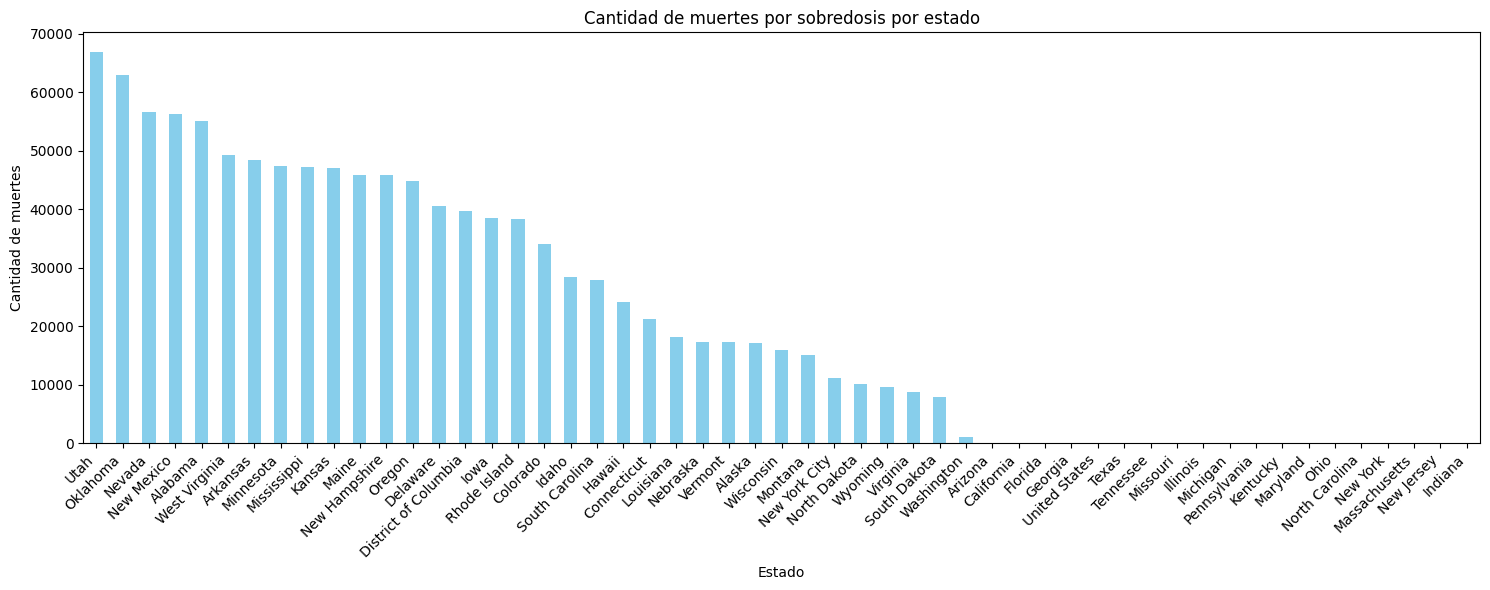

In [42]:
#agrupo datos por estado y sumo
deaths_state= Num_of_drug_Overdose_23.groupby("State Name")["Data Value"].sum().sort_values(ascending=False)

plt.figure(figsize=(15,6))

deaths_state.plot(kind="bar", color= "skyblue")

plt.title("Cantidad de muertes por sobredosis por estado")
plt.xlabel('Estado')
plt.ylabel('Cantidad de muertes')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad

plt.tight_layout()
plt.show()

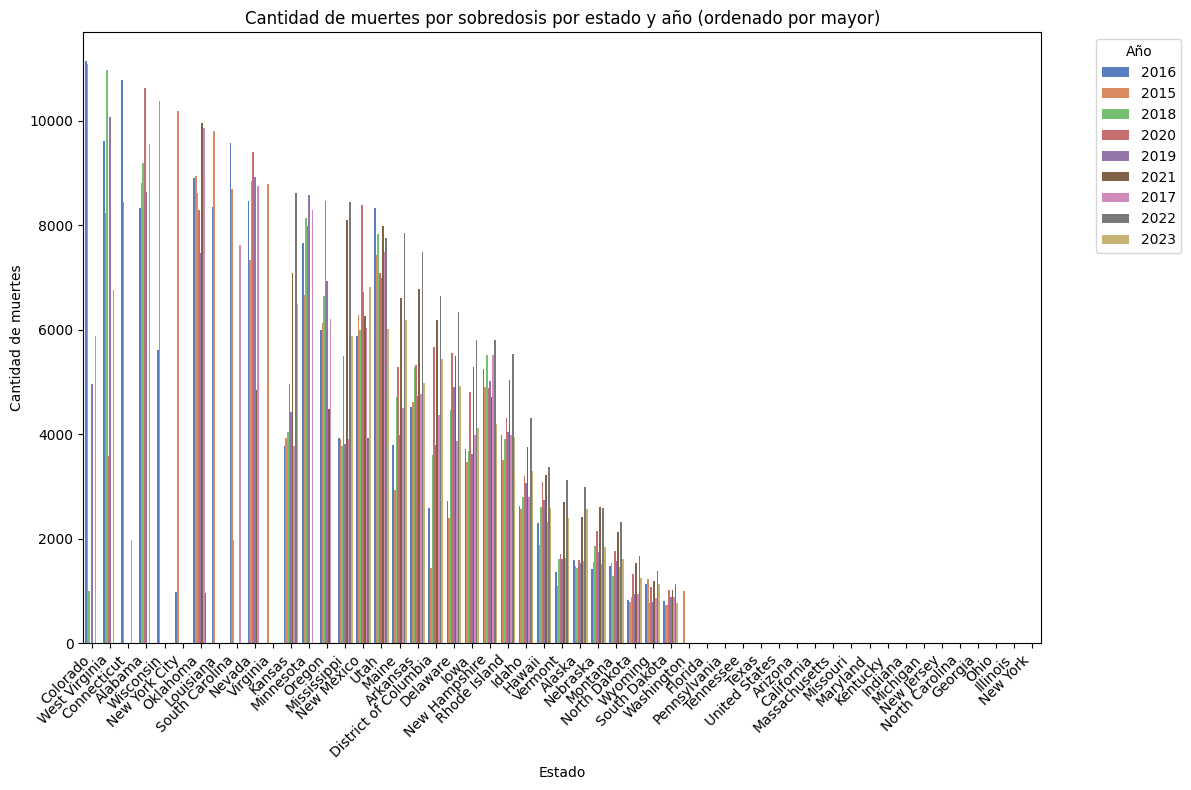

In [43]:
# Agrupar los datos por estado y año y sumar las muertes
muertes_por_estado_y_año = Num_of_drug_Overdose_23.groupby(['State Name', 'Year'])['Data Value'].sum().reset_index()

# Ordenar los datos por la cantidad de muertes de mayor a menor
muertes_por_estado_y_año_sorted = muertes_por_estado_y_año.sort_values(by='Data Value', ascending=False)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar los datos
sns.barplot(data=muertes_por_estado_y_año_sorted, x='State Name', y='Data Value', hue='Year', palette='muted', ax=ax)

# Personalizar el gráfico
ax.set_title('Cantidad de muertes por sobredosis por estado y año (ordenado por mayor)')
ax.set_xlabel('Estado')
ax.set_ylabel('Cantidad de muertes')
ax.set_xticklabels(muertes_por_estado_y_año_sorted['State Name'].unique(), rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
ax.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

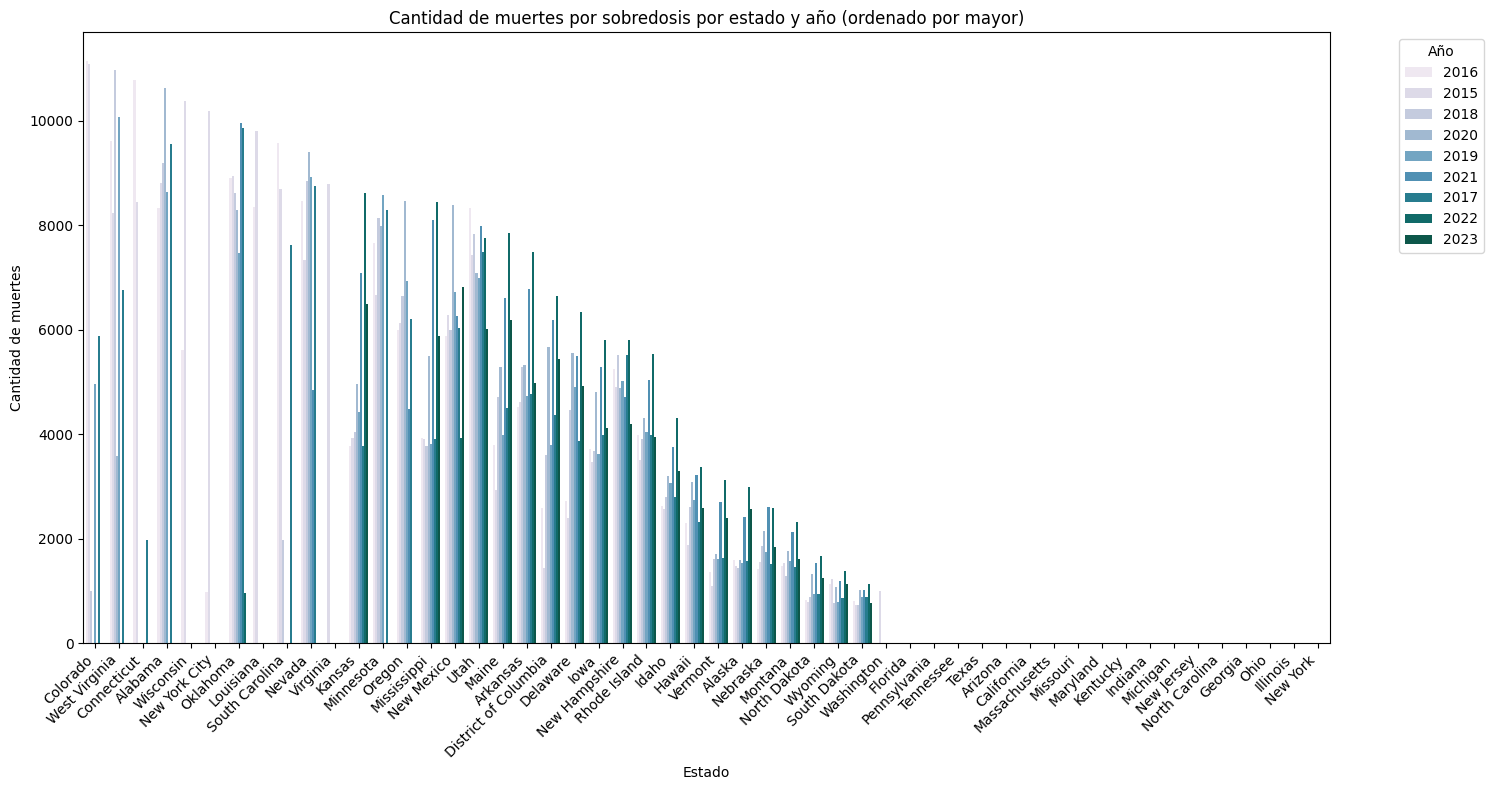

In [44]:
# Filtrar los datos para excluir el estado "United States"
muertes_por_estado_y_año_filtered = muertes_por_estado_y_año_sorted[muertes_por_estado_y_año_sorted['State Name'] != 'United States']

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(15, 8))

# Graficar los datos
sns.barplot(data=muertes_por_estado_y_año_filtered, x='State Name', y='Data Value', hue='Year', palette='PuBuGn', ax=ax)

# Personalizar el gráfico
ax.set_title('Cantidad de muertes por sobredosis por estado y año (ordenado por mayor)')
ax.set_xlabel('Estado')
ax.set_ylabel('Cantidad de muertes')
ax.set_xticklabels(muertes_por_estado_y_año_filtered['State Name'].unique(), rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
ax.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### **Conclusión**

### Cantidad de muertes por sobredosis relacionadas con el mes del año

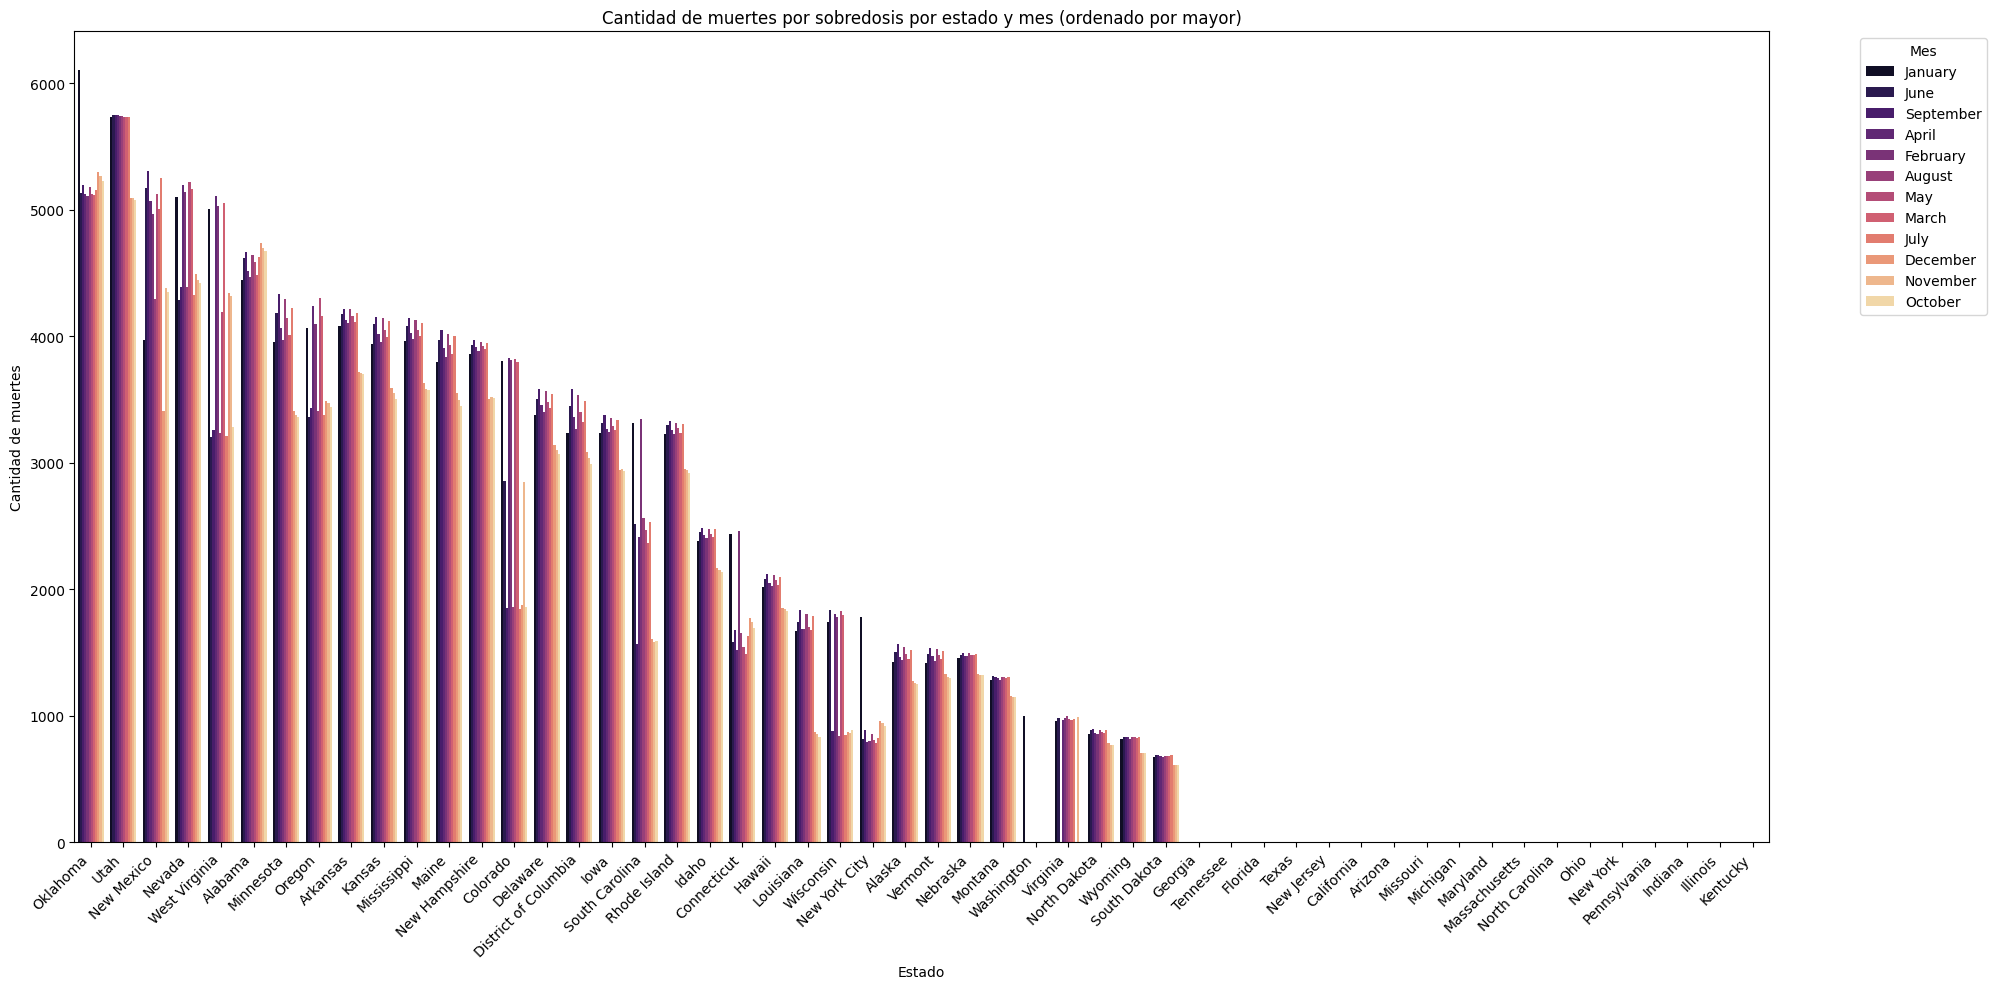

In [47]:
# Agrupar los datos por estado y año y sumar las muertes
muertes_por_estado_y_mes = Num_of_drug_Overdose_23.groupby(['State Name', 'Month'])['Data Value'].sum().reset_index()

# Ordenar los datos por la cantidad de muertes de mayor a menor
muertes_por_estado_y_año_sorted = muertes_por_estado_y_mes.sort_values(by='Data Value', ascending=False)


# Filtrar los datos para excluir el estado "United States"
muertes_por_estado_y_año_filtered = muertes_por_estado_y_año_sorted[muertes_por_estado_y_año_sorted['State Name'] != 'United States']

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(20,10))

# Graficar los datos
sns.barplot(data=muertes_por_estado_y_año_filtered, x='State Name', y='Data Value', hue='Month', palette='magma', ax=ax)

# Personalizar el gráfico
ax.set_title('Cantidad de muertes por sobredosis por estado y mes (ordenado por mayor)')
ax.set_xlabel('Estado')
ax.set_ylabel('Cantidad de muertes')
ax.set_xticklabels(muertes_por_estado_y_año_filtered['State Name'].unique(), rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
ax.legend(title='Mes', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### **Conclusión**